## Конструирование эпидемиологических моделей

Рассмотрите вариацию модели SIR, в которой часть инфицированных особей погибает.
Модель называется [SIRD](https://en.wikipedia.org/wiki/Compartmental_models_(epidemiology)), где каждый инфицированный имеет вероятность умереть в единицу времени, определяемую параметром $\mu$ (точнее, интенсивность).
Остальные параметры интенсивности $\beta$ и $\gamma$, которые определяют вероятность заражения и вероятность выздоровления в единицу времени,
задаются аналогично модели SIR. Система дифференциальных уравнений для модели SIRD выглядит следующим образом.

\begin{align}
\left\{
        \begin{array}{l}
        {\displaystyle {\frac {dS}{dt}}=-\beta IS}  \\
        {\displaystyle \frac {dI}{dt} = {\beta IS} - \gamma I -\mu I}
        \\
        {\displaystyle \frac {dR}{dt} = \gamma I}
        \\
        {\displaystyle \frac {dD}{dt} = \mu I}
        \end{array}
        \right.
\end{align}

Решите численно систему дифференциальных уравнений. Рассмотрите период 546 дней (полтора года) для популяции из $N$ = 1000 особей. Используйте следующие начальные условия:
1.  число инфицированных в начале $I_{0}$ = 3;
2.  число выздоровевших $R_{0}$ = 0;
3.  число погибших $D_{0}$ = 0;
4.  число здоровых особей $S_{0} = N - I_{0} - R_{0} - D_{0}$.

Используйте следующие значения параметров модели:
1.  интенсивность заражения $\beta$ = 0.0001;
2.  интенсивность выздоровления $\gamma$ = 0.035;
3.  интенсивность смерти $\mu$ = 0.005.

Постройте график, отображающий в процентах изменения следующих величин с течением времени:
1.  число здоровых особей;
2.  число инфицированных особей;
3.  число выздоровевших особей;
4.  число живых особей;
5.  общее число всех особей в модели $S+R+I+D$.

Ответьте на следующие вопросы.
1.  Сколько осталось здоровых не инфицированных особей на последний день наблюдений?
2.  Сколько осталось живых особей на последний день наблюдений?

Смоделируйте ситуацию временного снижения интенсивности заражения. Для этого при численном решении системы дифференциальных уравнений следует использовать времезависимый параметр $\beta(t)$. В первые 300 дней наблюдений рассмотрите следующую динамику параметра $\beta(t)$:
- в течение первых 30 дней параметр $\beta(t)$ остаётся постоянным и равным исходному значению;
- затем параметр плавно уменьшается в два раза относительно исходного значения
на период продолжительностью примерно 30 дней,
после чего плавно возвращается к исходному значению
и остаётся постоянным в течение следующих 60 дней;
- далее, в оставшийся период первых 300 дней наблюдений,
параметр $\beta(t)$ уменьшается в десять раз относительно исходного значения
на период продолжительностью примерно 30 дней,
после чего возвращается к исходному уровню;
- в последующий период наблюдений значение параметра $\beta(t)$
остаётся постоянным и равным исходному значению.

Изменение параметра должно происходить плавно и равномерно по времени,
с последующим возвращением значения $\beta(t)$ к исходному уровню
между периодами снижения и после их завершения.

Постройте график, отображающий в процентах изменения следующих величин с течением времени:
1.  число здоровых особей;
2.  число инфицированных особей;
3.  число выздоровевших особей;
4.  число живых особей;
5.  общее число всех особей в модели $S+R+I+D$.

Оцените конечное влияние введённых изменений параметра на численность особей в каждой группе по сравнению со случаем постоянного значения параметра. Результат представьте в процентах или в абсолютных величинах.

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Параметры модели
N = 1000
I0 = 3
R0 = 0
D0 = 0
S0 = N - I0 - R0 - D0

beta_const = 0.0001
gamma = 0.035
mu = 0.005

# Временной интервал
t_span = (0, 546)
t_eval = np.arange(0, 547, 1)

In [23]:
def sird_const(t, y):
    S, I, R, D = y
    dSdt = -beta_const * S * I
    dIdt = beta_const * S * I - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return [dSdt, dIdt, dRdt, dDdt]

In [24]:
y0 = [S0, I0, R0, D0]
sol_const = solve_ivp(sird_const, t_span, y0, t_eval=t_eval)

S_const, I_const, R_const, D_const = sol_const.y
Alive_const = S_const + I_const + R_const
Total_const = S_const + I_const + R_const + D_const

In [25]:
def beta_time(t):
    if t <= 30:
        return beta_const
    elif 30 < t <= 60:
        return beta_const * (1 - 0.5 * (t - 30)/30)
    elif 60 < t <= 90:
        return beta_const * (0.5 + 0.5 * (t - 60)/30)
    elif 90 < t <= 150:
        return beta_const
    elif 150 < t <= 180:
        return beta_const * (1 - 0.9 * (t - 150)/30)
    elif 180 < t <= 210:
        return beta_const * (0.1 + 0.9 * (t - 180)/30)
    else:
        return beta_const 


In [26]:
def sird_timevarying(t, y):
    S, I, R, D = y
    b = beta_time(t)
    dSdt = -b * S * I
    dIdt = b * S * I - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return [dSdt, dIdt, dRdt, dDdt]

In [27]:
sol_var = solve_ivp(sird_timevarying, t_span, y0, t_eval=t_eval)

S_var, I_var, R_var, D_var = sol_var.y
Alive_var = S_var + I_var + R_var
Total_var = S_var + I_var + R_var + D_var

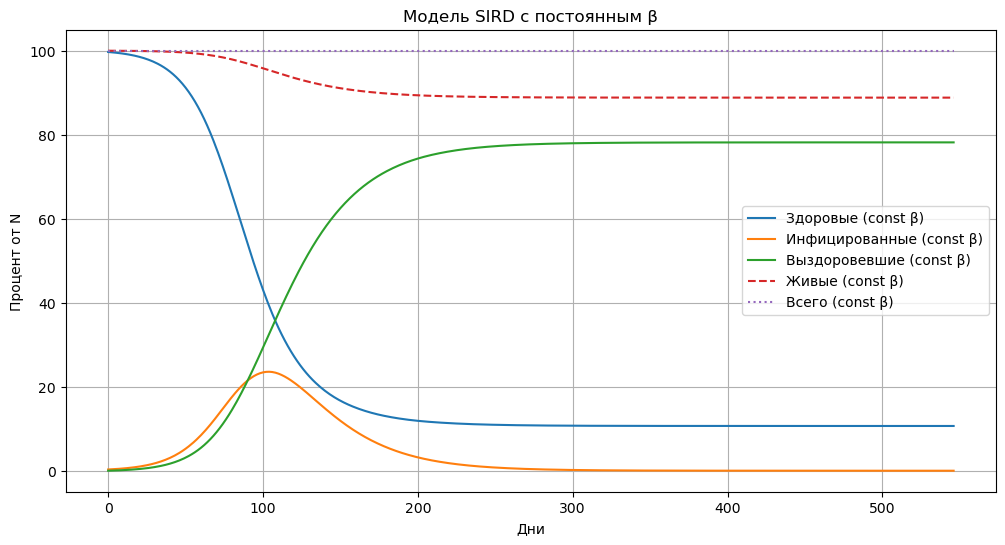

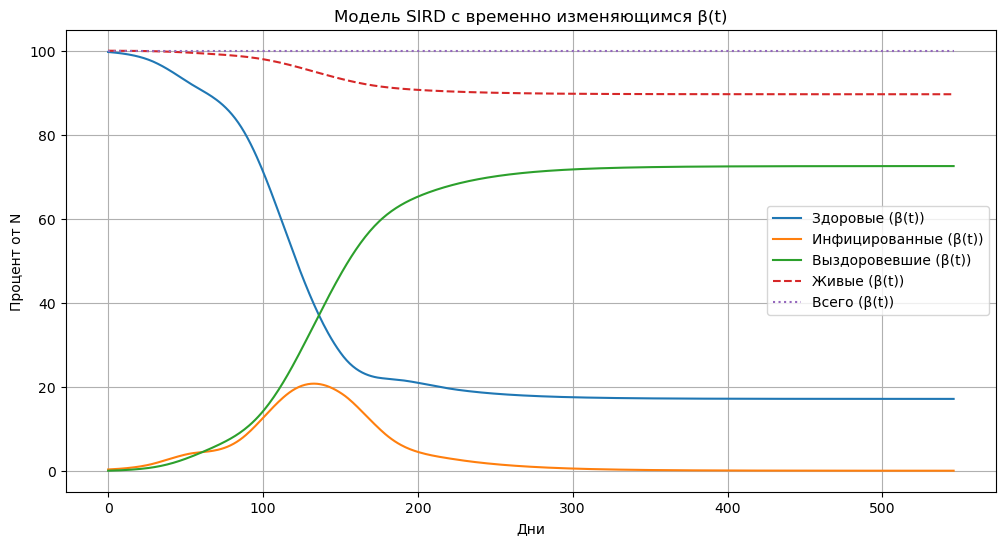

In [28]:
plt.figure(figsize=(12,6))
plt.plot(t_eval, 100*S_const/N, label='Здоровые (const β)')
plt.plot(t_eval, 100*I_const/N, label='Инфицированные (const β)')
plt.plot(t_eval, 100*R_const/N, label='Выздоровевшие (const β)')
plt.plot(t_eval, 100*Alive_const/N, '--', label='Живые (const β)')
plt.plot(t_eval, 100*Total_const/N, ':', label='Всего (const β)')
plt.xlabel('Дни')
plt.ylabel('Процент от N')
plt.title('Модель SIRD с постоянным β')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(t_eval, 100*S_var/N, label='Здоровые (β(t))')
plt.plot(t_eval, 100*I_var/N, label='Инфицированные (β(t))')
plt.plot(t_eval, 100*R_var/N, label='Выздоровевшие (β(t))')
plt.plot(t_eval, 100*Alive_var/N, '--', label='Живые (β(t))')
plt.plot(t_eval, 100*Total_var/N, ':', label='Всего (β(t))')
plt.xlabel('Дни')
plt.ylabel('Процент от N')
plt.title('Модель SIRD с временно изменяющимся β(t)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
print("Постоянный β:")
print(f"Здоровые на последний день: {S_const[-1]:.0f}")
print(f"Живые на последний день: {Alive_const[-1]:.0f}")

print("\nВременный β(t):")
print(f"Здоровые на последний день: {S_var[-1]:.0f}")
print(f"Живые на последний день: {Alive_var[-1]:.0f}")

Постоянный β:
Здоровые на последний день: 107
Живые на последний день: 888

Временный β(t):
Здоровые на последний день: 171
Живые на последний день: 896


In [30]:
diff_S = S_var[-1] - S_const[-1]
diff_Alive = Alive_var[-1] - Alive_const[-1]

print("\nВлияние временного снижения β(t) на численность:")
print(f"Разница в здоровых: {diff_S:.0f}")
print(f"Разница в живых: {diff_Alive:.0f}")

print("\nВлияние временного снижения β(t) на численность:")
print(f"Разница в здоровых: {diff_S/N*100:.2f}%")
print(f"Разница в живых: {diff_Alive/N*100:.2f}%")


Влияние временного снижения β(t) на численность:
Разница в здоровых: 64
Разница в живых: 8

Влияние временного снижения β(t) на численность:
Разница в здоровых: 6.45%
Разница в живых: 0.81%
